In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice
from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import ns2250_control_with_no_lateral_20210824
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result
from thesis_v2.analysis.ns2250 import load_ccmax

In [2]:
import pandas as pd

In [3]:
def load_new_result():
    f_main_result = join(dir_dict['analyses'], 'ns2250', 'main_control_20210824', 'perf.pkl')
    if not exists(f_main_result):
        makedirs(dirname(f_main_result), exist_ok=True)
        df_main_result = collect_rcnn_k_bl_main_result(
            fixed_keys = {
            'kernel_size_l23': 3,
            'kernel_size_l1': 9,
            'ff_1st_block': True,
            'pooling_ksize': 3,
            'pooling_type': 'avg',
            'bn_after_fc': False,
            'rcnn_bl_psize': 1,
            'rcnn_bl_ptype': None,
            'input_size': 37,
            'split_seed': 'legacy',
            'dataset_prefix': 'tang',
            'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
            'scale_name': '0.01',
            'scale': '0.01',
            'smoothness_name': '0.000005',
            'smoothness': '0.000005',
            'additional_key': '0,500',
            'no_lateral': True,
        },
            generator=chain(
                ns2250_control_with_no_lateral_20210824(with_source=True),
            ),
            total_num_param=28,
            train_size_mapping=dict(),
            no_missing_data=True,
            cc_max_all_neurons=load_ccmax(),
            num_neuron=34,
            skip_eval_json=True,
        )
        df_main_result.to_pickle(f_main_result)
        del df_main_result
    df_main_result = pd.read_pickle(f_main_result)
    return df_main_result

In [4]:
df_main_result_new = load_new_result()
df_main_result_new

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           inst-avg     1400              0.405179   
                                                                         3           inst-avg     1400              0.396120   
                                                                         4           inst-avg     1400              0.415122   
                                                                         5           inst-avg     1400              0.401694   
                                                                         6           inst-avg     1400              0.401914   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     1400              0.452443   
                                                                         4           inst-avg     1400              0.444758   
                                                                         5           inst-avg     1400              0.448371   
                                                                         6           inst-avg     1400              0.453329   
                                                                         7           inst-avg     1400              0.454201   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           inst-avg     1400           0.376503   
                                                                         3           inst-avg     1400           0.368295   
                                                                         4           inst-avg     1400           0.385800   
                                                                         5           inst-avg     1400           0.373488   
                                                                         6           inst-avg     1400           0.373815   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     1400           0.420022   
                                                                         4           inst-avg     1400           0.413072   
                                                                         5           inst-avg     1400           0.416529   
                                                                         6           inst-avg     1400           0.420703   
                                                                         7           inst-avg     1400           0.421110   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           inst-avg     1400          0.586863   
                                                                         3           inst-avg     1400          0.580436   
                                                                         4           inst-avg     1400          0.595050   
                                                                         5           inst-avg     1400          0.582540   
                                                                         6 

In [5]:
# disable what's below. it's there just for checking against original results generated piece by piece.

In [6]:
# check against old result
def load_old_result():
    f_main_result = join(dir_dict['analyses'], 'ns2250', 'main', 'perf.pkl')
    df_main_result = pd.read_pickle(f_main_result)
    return df_main_result

In [7]:
df_main_result_old = load_old_result()

In [8]:
df_main_result_old

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           1           cm-avg       350               0.260392   
                                                                                                  700               0.345669   
                                                                                                  1400              0.392034   
                                                                                     cm-last      350               0.260392   
                                                                                                  700               0.345669   
...                                                                                                                      ...   
softplus True                 poisson   1          6         16          1           legacy       700               0.414992   
                                                                                                  1400              0.459499   
                                                             32          1           legacy       350               0.352038   
                                                                                                  700               0.411811   
                                                                                                  1400              0.478902   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           1           cm-avg       350            0.242842   
                                                                                                  700            0.322136   
                                                                                                  1400           0.364931   
                                                                                     cm-last      350            0.242842   
                                                                                                  700            0.322136   
...                                                                                                                   ...   
softplus True                 poisson   1          6         16          1           legacy       700            0.385274   
                                                                                                  1400           0.425949   
                                                             32          1           legacy       350            0.326924   
                                                                                                  700            0.382036   
                                                                                                  1400           0.443590   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           1           cm-avg       350           0.449782   
                                                                                                  700           0.527187   
                                                                                                  1400          0.573960   
                                                                                     cm-last      350           0.449782   
                                                                           

In [9]:
merged = df_main_result_new.join(df_main_result_old, how='inner', lsuffix='_new', rsuffix='_old')

In [10]:
merged

cc2_normed_avg_new  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           2           inst-avg     1400                  0.405179   
                                                                         3           inst-avg     1400                  0.396120   
                                                                         4           inst-avg     1400                  0.415122   
                                                                         5           inst-avg     1400                  0.401694   
                                                                         6           inst-avg     1400                  0.401914   
...                                                                                                                          ...   
softplus True                 poisson   1          3         32          3           inst-avg     1400                  0.452443   
                                                                         4           inst-avg     1400                  0.444758   
                                                                         5           inst-avg     1400                  0.448371   
                                                                         6           inst-avg     1400                  0.453329   
                                                                         7           inst-avg     1400                  0.454201   

                                                                                                              cc2_raw_avg_new  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           2           inst-avg     1400               0.376503   
                                                                         3           inst-avg     1400               0.368295   
                                                                         4           inst-avg     1400               0.385800   
                                                                         5           inst-avg     1400               0.373488   
                                                                         6           inst-avg     1400               0.373815   
...                                                                                                                       ...   
softplus True                 poisson   1          3         32          3           inst-avg     1400               0.420022   
                                                                         4           inst-avg     1400               0.413072   
                                                                         5           inst-avg     1400               0.416529   
                                                                         6           inst-avg     1400               0.420703   
                                                                         7           inst-avg     1400               0.421110   

                                                                                                              cc_raw_avg_new  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           inst-avg     1400              0.586863   
                                                                         3           inst-avg     1400              0.580436   
                                                                         4           inst-avg     1400              0.595050   
                                                                         5 

In [11]:
%matplotlib inline

In [12]:
from thesis_v2.plots.basic import scatter

In [13]:
from matplotlib import pyplot as plt

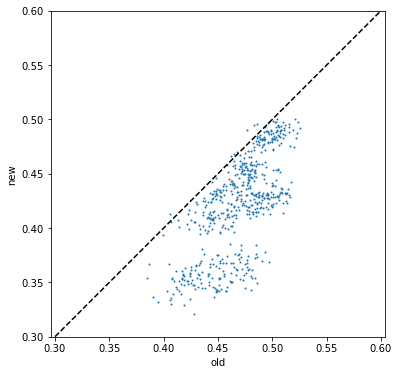

In [14]:
plt.close('all')
fig, ax = plt.subplots(1,1,squeeze=True, figsize=(6,6))
scatter(ax,
       x=merged['cc2_normed_avg_old'].values,
        y=merged['cc2_normed_avg_new'].values,
        xlabel='old',
        ylabel='new',
        xlim=(0.3, 0.6),
        ylim=(0.3, 0.6)
       )